In [1]:
import pandas as pd
import networkx as nx
import os
from matplotlib import pyplot as plt
%run ~/rtg-networks/graphoperator/graphoperator/graphoperator.py
%matplotlib inline

In [2]:
# simple example of Normal Cut and Shi & Malic's Method

In [70]:
lob = nx.random_lobster(5, 0.6, 0.9, seed = 37)
lobGraph = GraphOperator(lob, "combinatorial laplacian")

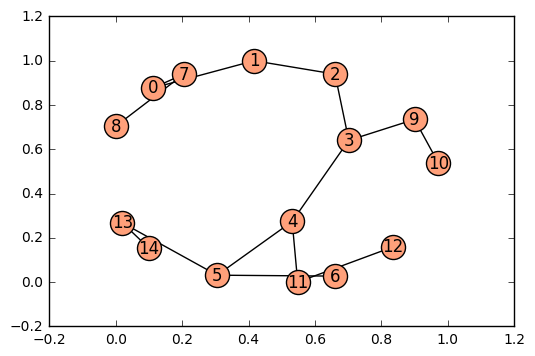

In [71]:
lobGraph.draw_graph(node_size = 300, alpha = 1)
plt.show()

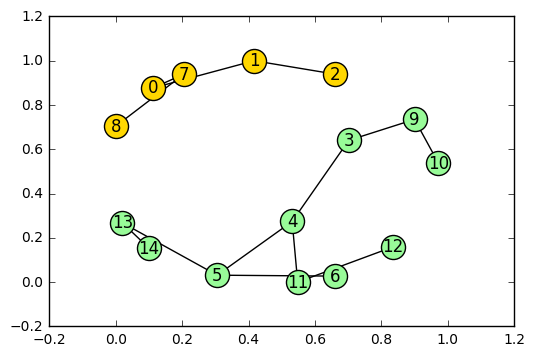

In [72]:
list_nodes = lobGraph._split_once(standardVal = 0)
lobGraph.draw_partitionGraph(list_nodes, removeEdges = True, 
                             list_color = ['palegreen', 'gold'], 
                             node_size = 300, alpha = 1)
plt.show()

In [3]:
datadirectory = '/home/william/localRTG/facebook'#specify the directory your dataset in
efnames = [datadirectory + '/' +  f for f in os.listdir(datadirectory) if 'edges' in f]
g = nx.Graph()

In [4]:
for efname in efnames:
    ELdf = pd.read_csv(efname,sep=' ',header=None)
    eliter = ELdf.iterrows()
    for e in eliter:
        g.add_edge(*tuple(e[1]))

In [5]:
g.number_of_edges()

84243

In [6]:
g.number_of_nodes()

3959

In [7]:
graphs = list(nx.connected_component_subgraphs(g))
graphs.sort(key = lambda x : x.number_of_nodes(), reverse = True)
[x.number_of_nodes() for x in graphs]

[3927, 6, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]

In [8]:
g1 = GraphOperator(graphs[0], "normalized laplacian");

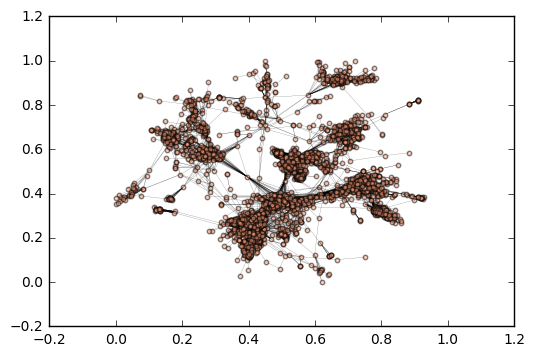

In [9]:
g1.draw_graph(labels = False, node_size = 10, width = 0.1)

In [10]:
list_subgraph_nodes = g1.partition(3)

In [11]:
[len(i) for i in list_subgraph_nodes]

[730, 1060, 2137]

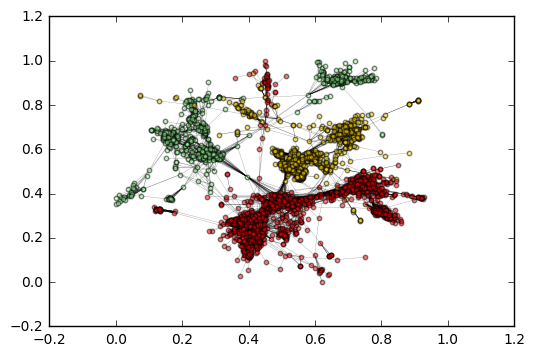

In [12]:
g1.draw_partitionGraph(list_subgraph_nodes, list_color = ['palegreen', 'gold', 'r'], 
                       labels = False, node_size = 10, width = 0.1)

In [13]:
list_subgraph_nodes = g1.partition(4)
[len(i) for i in list_subgraph_nodes]

[1060, 730, 1371, 766]

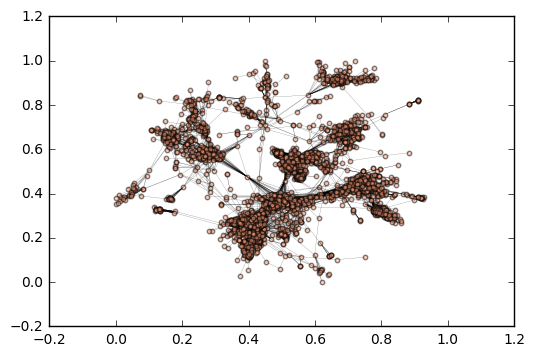

In [14]:
g1.draw_graph(labels = False, node_size = 10, width = 0.1)

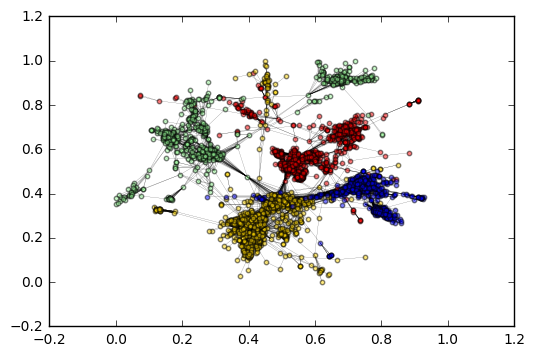

In [15]:
g1.draw_partitionGraph(list_subgraph_nodes, 
                       list_color = ['red', 'palegreen', 'gold', 'blue'], 
                       labels = False, node_size = 10, width = 0.1)

In [18]:
# g1.KMeans(2)
# list_nodes = g1.KMeans_partition(5)
# g1.draw_partitionGraph(list_nodes, 
#                        list_color = ['palegreen', 'gold', 'r', 'gray', 'pink'], 
#                        labels = False, node_size = 10, width = 0.1)